In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/field-of-study-vs-occupation/career_change_prediction_dataset.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Create function to load a new DataFrame
def load_new_dataframe(filename):
    try: 
        df = pd.read_csv(filename)
    except: 
        print("Unable to load {filename}! Please check file location and try again!")
    
    return df
    
df = load_new_dataframe("/kaggle/input/field-of-study-vs-occupation/career_change_prediction_dataset.csv")


## Data Preparation

In [4]:
# Count the number of null values
df.isnull().sum()

Field of Study                    0
Current Occupation                0
Age                               0
Gender                            0
Years of Experience               0
Education Level                   0
Industry Growth Rate              0
Job Satisfaction                  0
Work-Life Balance                 0
Job Opportunities                 0
Salary                            0
Job Security                      0
Career Change Interest            0
Skills Gap                        0
Family Influence               9632
Mentorship Available              0
Certifications                    0
Freelancing Experience            0
Geographic Mobility               0
Professional Networks             0
Career Change Events              0
Technology Adoption               0
Likely to Change Occupation       0
dtype: int64

In [5]:
# Check the proportion of missing values.
df.isnull().mean()

Field of Study                 0.000000
Current Occupation             0.000000
Age                            0.000000
Gender                         0.000000
Years of Experience            0.000000
Education Level                0.000000
Industry Growth Rate           0.000000
Job Satisfaction               0.000000
Work-Life Balance              0.000000
Job Opportunities              0.000000
Salary                         0.000000
Job Security                   0.000000
Career Change Interest         0.000000
Skills Gap                     0.000000
Family Influence               0.250546
Mentorship Available           0.000000
Certifications                 0.000000
Freelancing Experience         0.000000
Geographic Mobility            0.000000
Professional Networks          0.000000
Career Change Events           0.000000
Technology Adoption            0.000000
Likely to Change Occupation    0.000000
dtype: float64

In [6]:
# Impute missing categorical values
df['Family Influence'].fillna('Unknown', inplace=True)

In [7]:
# Identify categorical columns and convert them to 'category' dtype
categorical_columns = df.select_dtypes(include='object').columns

# Identify integer columns and convert them to 'int32' dtype
int_columns = df.select_dtypes(include='int64').columns

# Assign categorical data to DataFrames
df[categorical_columns] = df[categorical_columns].astype('category')

# Assign integer data to DataFrames
df[int_columns] = df[int_columns].astype('int32')


# Exploratory Data Analysis

## Inspect the Dataset

In [8]:
# Display the first 5 rows of data
df.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


In [9]:
# Display non-null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38444 entries, 0 to 38443
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Field of Study               38444 non-null  category
 1   Current Occupation           38444 non-null  category
 2   Age                          38444 non-null  int32   
 3   Gender                       38444 non-null  category
 4   Years of Experience          38444 non-null  int32   
 5   Education Level              38444 non-null  category
 6   Industry Growth Rate         38444 non-null  category
 7   Job Satisfaction             38444 non-null  int32   
 8   Work-Life Balance            38444 non-null  int32   
 9   Job Opportunities            38444 non-null  int32   
 10  Salary                       38444 non-null  int32   
 11  Job Security                 38444 non-null  int32   
 12  Career Change Interest       38444 non-null  int32   
 13  S

In [10]:
# Display descriptive statistics for numerical dtypes
numerical_summary = df.describe()

# Print the summary for a quick inspection
display(numerical_summary)

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
count,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000,38444.000000
mean,39.540422,19.548200,5.489673,5.517012,50.308267,114975.623999,5.481896,0.199901,5.520133,0.299943,0.298616,0.149204,0.303975,5.514098,1.003304,5.487904,0.576553
std,11.574509,11.552474,2.870407,2.879007,28.877294,48963.725598,2.870640,0.399931,2.870065,0.458239,0.457657,0.356294,0.459978,2.868188,0.815953,2.857247,0.494111
min,20.000000,0.000000,1.000000,1.000000,1.000000,30005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,30.000000,10.000000,3.000000,3.000000,25.000000,72701.500000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000
50%,40.000000,20.000000,6.000000,6.000000,50.000000,114861.000000,5.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.000000,5.000000,1.000000
75%,50.000000,30.000000,8.000000,8.000000,75.000000,157241.000000,8.000000,0.000000,8.000000,1.000000,1.000000,0.000000,1.000000,8.000000,2.000000,8.000000,1.000000
max,59.000000,39.000000,10.000000,10.000000,100.000000,199996.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,10.000000,2.000000,10.000000,1.000000


In [11]:
# Describe the categorical columns to get summary statistics (counts, unique, top, freq)
categorical_summary = df[categorical_columns].describe()

# Print the summary for a quick inspection
display(categorical_summary)

,Field of Study,Current Occupation,Gender,Education Level,Industry Growth Rate,Family Influence
count,38444,38444,38444,38444,38444,38444
unique,10,10,2,4,3,4
top,Medicine,Software Developer,Female,PhD,High,High
freq,3949,3892,19299,9777,12968,9635


In [12]:
df.shape

(38444, 23)

## Explore Value Distributions

### Count occurrences of unique values in categorical columns

In [13]:
# 
df['Field of Study'].value_counts()

Field of Study
Medicine                  3949
Biology                   3921
Business                  3921
Education                 3896
Mechanical Engineering    3875
Law                       3851
Computer Science          3826
Arts                      3763
Economics                 3743
Psychology                3699
Name: count, dtype: int64

In [14]:
# 
df['Current Occupation'].value_counts()

Current Occupation
Software Developer     3892
Psychologist           3890
Doctor                 3888
Teacher                3886
Artist                 3881
Business Analyst       3858
Mechanical Engineer    3827
Lawyer                 3781
Biologist              3774
Economist              3767
Name: count, dtype: int64

In [15]:
# 
df['Gender'].value_counts()

Gender
Female    19299
Male      19145
Name: count, dtype: int64

In [16]:
# 
df['Education Level'].value_counts()

Education Level
PhD            9777
High School    9623
Master's       9597
Bachelor's     9447
Name: count, dtype: int64

In [17]:
# 
df['Industry Growth Rate'].value_counts()

Industry Growth Rate
High      12968
Medium    12884
Low       12592
Name: count, dtype: int64

In [18]:
# 
df['Family Influence'].value_counts()

Family Influence
High       9635
Unknown    9632
Medium     9618
Low        9559
Name: count, dtype: int64

### Check distributions for numerical columns

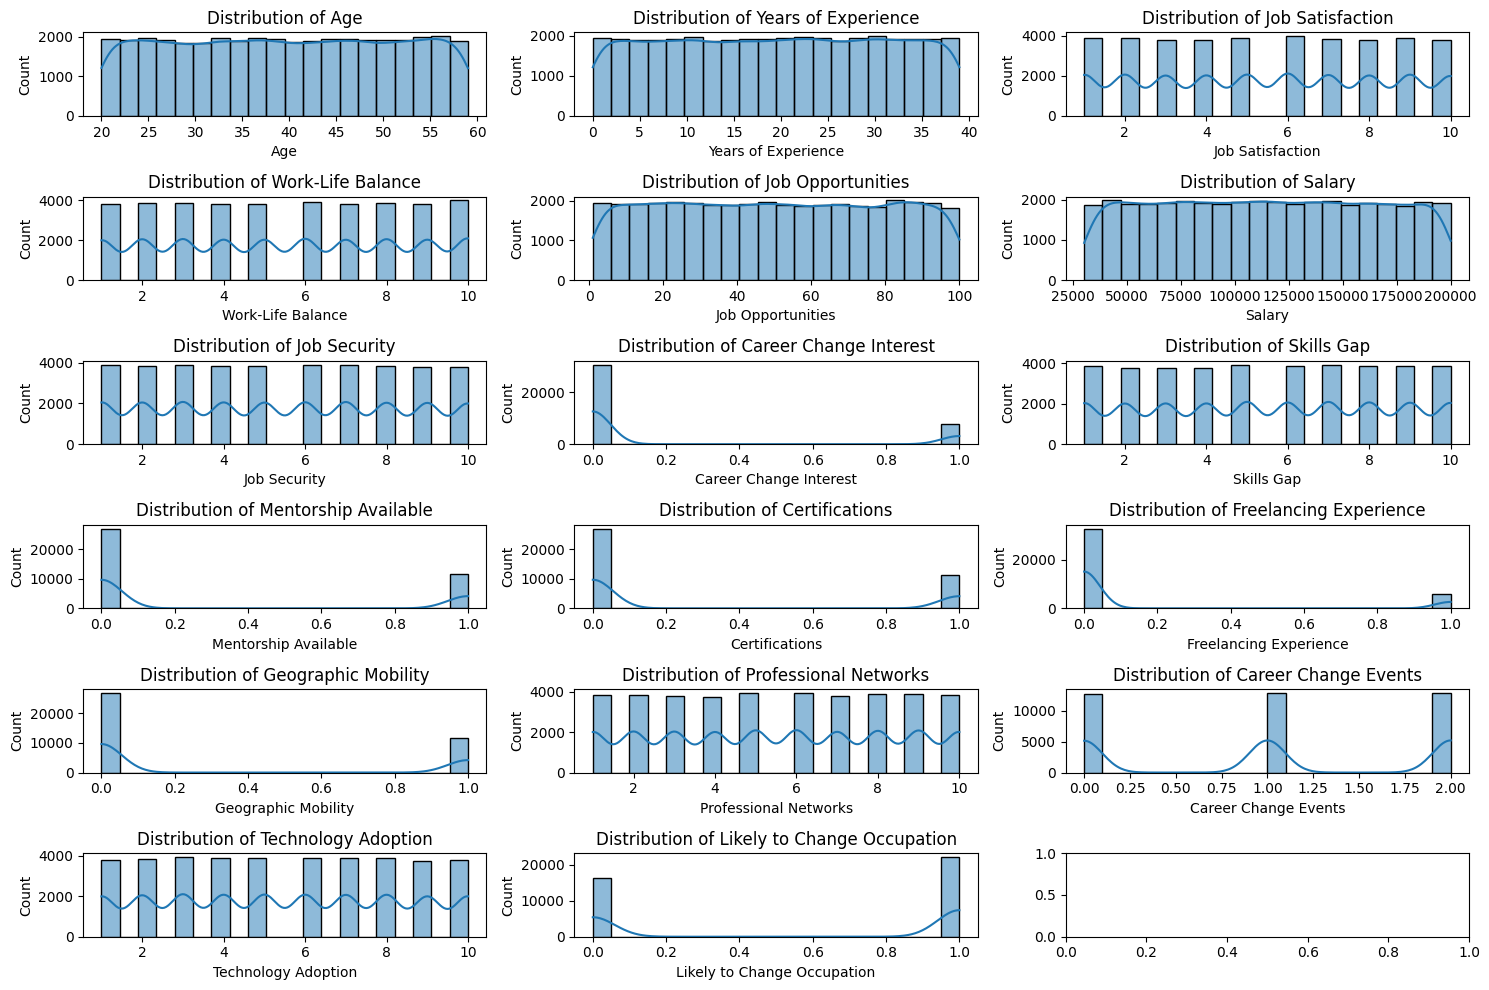

In [19]:
# Create subplots: Adjust the size based on the number of columns
fig, axes = plt.subplots(nrows=len(int_columns)//3 + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()  # Flatten to make indexing easier

# Step 2: Plot each column in a separate subplot
for i, column in enumerate(int_columns):
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Step 3: Adjust layout and show plot
plt.tight_layout()
plt.show()


## Identify and Handle Duplicates

In [20]:
df.duplicated().sum()

0

## Check for Outliers

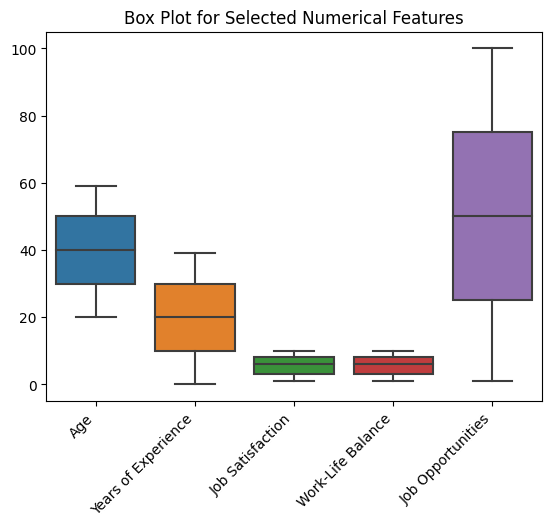

In [21]:
# Select a subset of columns (e.g., top 5 numerical columns)
subset_columns = df.select_dtypes(include='number').columns[:5]

# Create the box plot for the selected columns
sns.boxplot(data=df[subset_columns])

# Rotate the labels if necessary
plt.xticks(rotation=45, ha='right')

# Add a title and show the plot
plt.title('Box Plot for Selected Numerical Features')
plt.show()

## Analyze Relationships

In [22]:
# Examine correlation between numerical features
df[int_columns].corr()

,Age,Years of Experience,Job Satisfaction,Work-Life Balance,Job Opportunities,Salary,Job Security,Career Change Interest,Skills Gap,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
Age,1.000000,0.003682,0.001191,0.004900,0.002576,0.003683,0.005077,-0.001451,-0.002010,-0.008865,0.001223,0.004643,0.005304,0.001481,0.012376,0.002228,-0.005483
Years of Experience,0.003682,1.000000,-0.005106,-0.003602,0.003335,0.000032,0.005392,0.001245,-0.002583,0.000569,0.001765,0.009426,-0.000868,-0.007943,-0.000153,-0.003327,-0.002004
Job Satisfaction,0.001191,-0.005106,1.000000,-0.006912,-0.002664,-0.004733,0.003433,0.002444,-0.004738,-0.001393,0.000130,0.006085,-0.005345,0.002986,-0.002479,0.004812,-0.595550
Work-Life Balance,0.004900,-0.003602,-0.006912,1.000000,-0.008166,0.003372,0.004280,0.006772,-0.009977,0.002964,-0.009581,-0.012060,-0.000625,-0.003680,0.004101,0.007240,0.005768
Job Opportunities,0.002576,0.003335,-0.002664,-0.008166,1.000000,-0.005110,0.002423,0.008079,0.010529,-0.005596,0.007430,0.002518,0.009805,0.009668,0.006395,0.000701,0.001047
Salary,0.003683,0.000032,-0.004733,0.003372,-0.005110,1.000000,0.005583,-0.006256,-0.010096,-0.008294,-0.011309,-0.009209,0.006643,0.003041,0.004661,-0.001686,-0.177951
Job Security,0.005077,0.005392,0.003433,0.004280,0.002423,0.005583,1.000000,-0.008845,-0.000006,0.002259,0.009402,-0.005523,-0.008677,0.000009,0.008083,0.001171,-0.006496
Career Change Interest,-0.001451,0.001245,0.002444,0.006772,0.008079,-0.006256,-0.008845,1.000000,-0.003654,-0.003273,-0.003534,-0.006140,-0.002127,-0.007866,-0.002980,0.001923,0.428367
Skills Gap,-0.002010,-0.002583,-0.004738,-0.009977,0.010529,-0.010096,-0.000006,-0.003654,1.000000,0.009975,-0.002458,-0.003446,-0.001976,0.000989,-0.007887,0.001573,0.002096
Mentorship Available,-0.008865,0.000569,-0.001393,0.002964,-0.005596,-0.008294,0.002259,-0.003273,0.009975,1.000000,-0.001035,0.001996,0.003439,0.000256,0.006464,-0.005047,-0.005082


### Essential Steps for EDA in Pandas

**Inspect the Dataset**:

`df.head()`: View the first few rows to get a glimpse of the data structure.

`df.info()`: Get an overview of column data types, non-null counts, and memory usage.

`df.describe(include='all')`: Summarize numerical and categorical columns, including count, mean, standard deviation, and unique values.

`df.shape`: Check the number of rows and columns.

**Check for Missing Values**:

`df.isnull().sum()`: Count missing values in each column.

`df.isnull().mean()`: Check the proportion of missing values.

**Understand Data Types**:

`df.dtypes`: Confirm data types for each column.

Use `pd.to_datetime()` or `astype()` to convert columns to appropriate types if needed (e.g., dates or categories).

**Explore Value Distributions**:

`df['column'].value_counts()`: Count occurrences of unique values in categorical columns.

`df.hist() or sns.histplot()`: Check distributions for numerical columns.

**Identify and Handle Duplicates**:

`df.duplicated().sum()`: Count duplicate rows.

`df.drop_duplicates()`: Drop duplicates if necessary.

**Check for Outliers**:

- Use visualization tools like box plots (`sns.boxplot()`).
- Use statistical techniques (e.g., IQR or z-scores).

**Analyze Relationships**:

`df.corr()`: Examine correlation between numerical features.

- Visualization tools like scatter plots, heatmaps, or pair plots.

- Check for Data Imbalances (if applicable):

- For target variables, especially in classification tasks, use `value_counts()` to check for class imbalances.